# <span style="color:red; font-family: Arial;">Random Forest - Company data</span>

# Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">A cloth manufacturing company is interested to know about the segment or attributes causes high sale. </h3>

# 2 - Data collection and processing

In [3]:
df = pd.read_csv('./Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df=pd.get_dummies(df,columns=['ShelveLoc','Urban','US'], drop_first=True)

In [5]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,False,False,True,True
1,11.22,111,48,16,260,83,65,10,True,False,True,True
2,10.06,113,35,10,269,80,59,12,False,True,True,True
3,7.40,117,100,4,466,97,55,14,False,True,True,True
4,4.15,141,64,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,True,False,True,True
396,6.14,139,23,3,37,120,55,11,False,True,False,True
397,7.41,162,26,12,368,159,40,18,False,True,True,True
398,5.94,100,79,7,284,95,50,12,False,False,True,True


# 3 - Visualization 

<Axes: xlabel='Age', ylabel='Sales'>

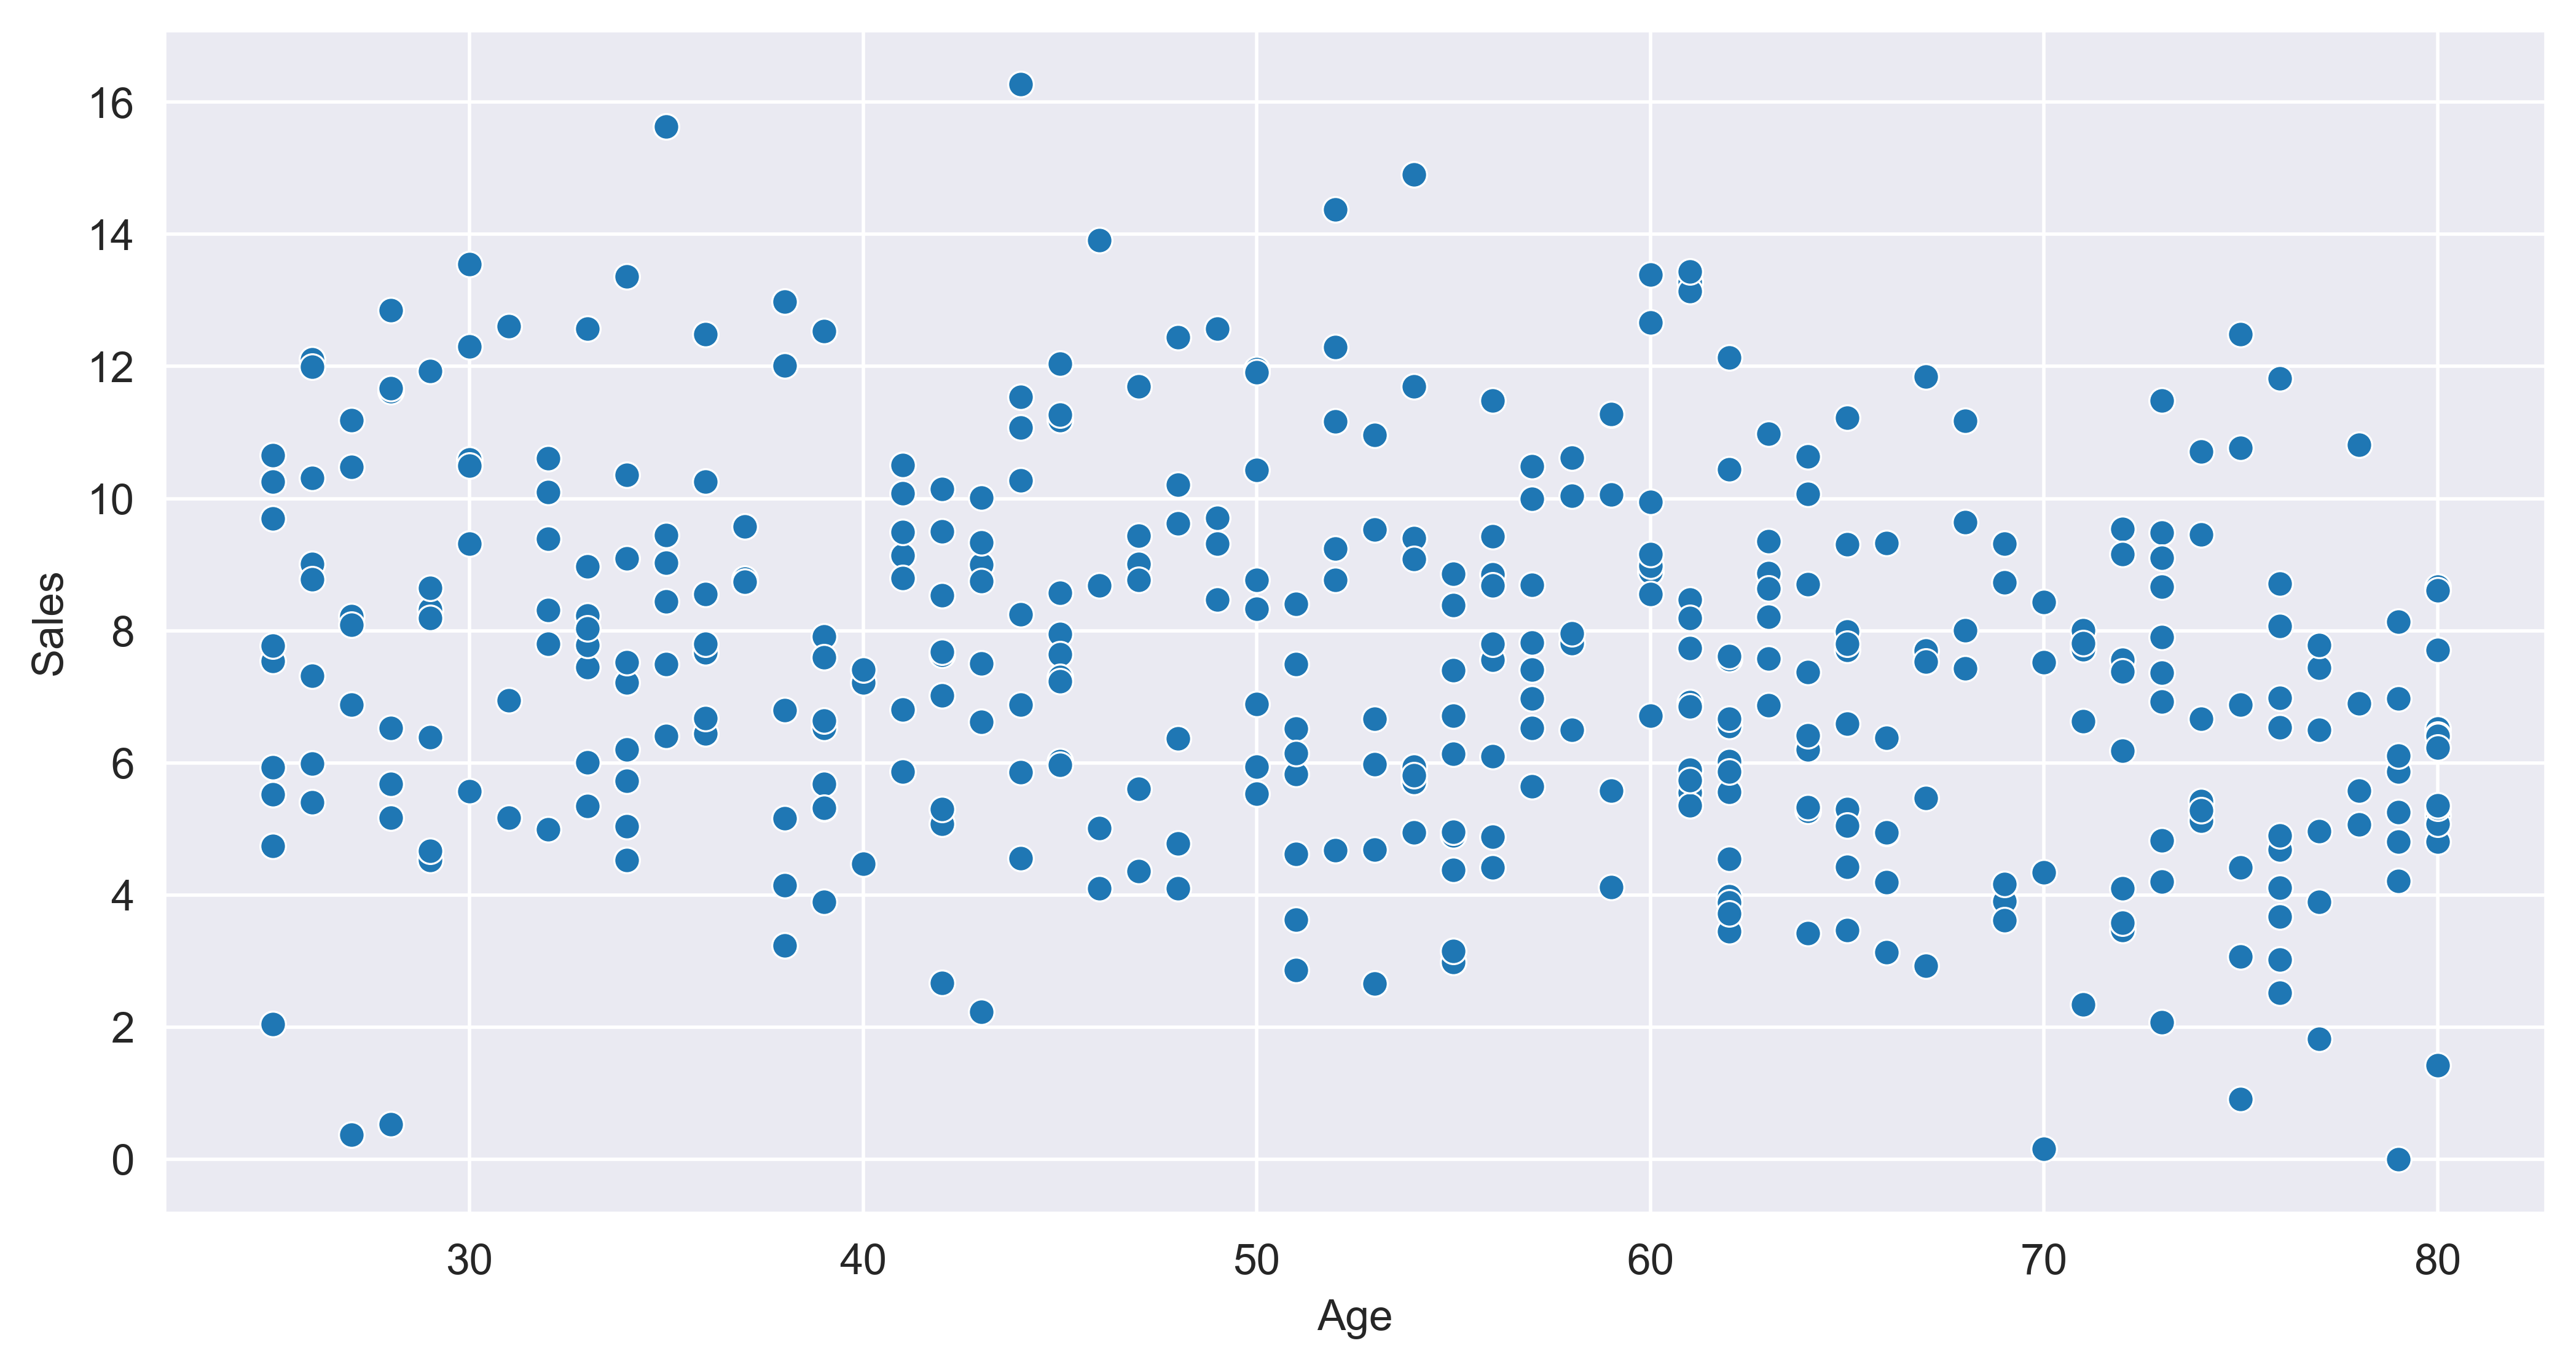

In [6]:
sns.scatterplot(x=df['Age'],y=df['Sales'])

<Axes: xlabel='CompPrice', ylabel='Sales'>

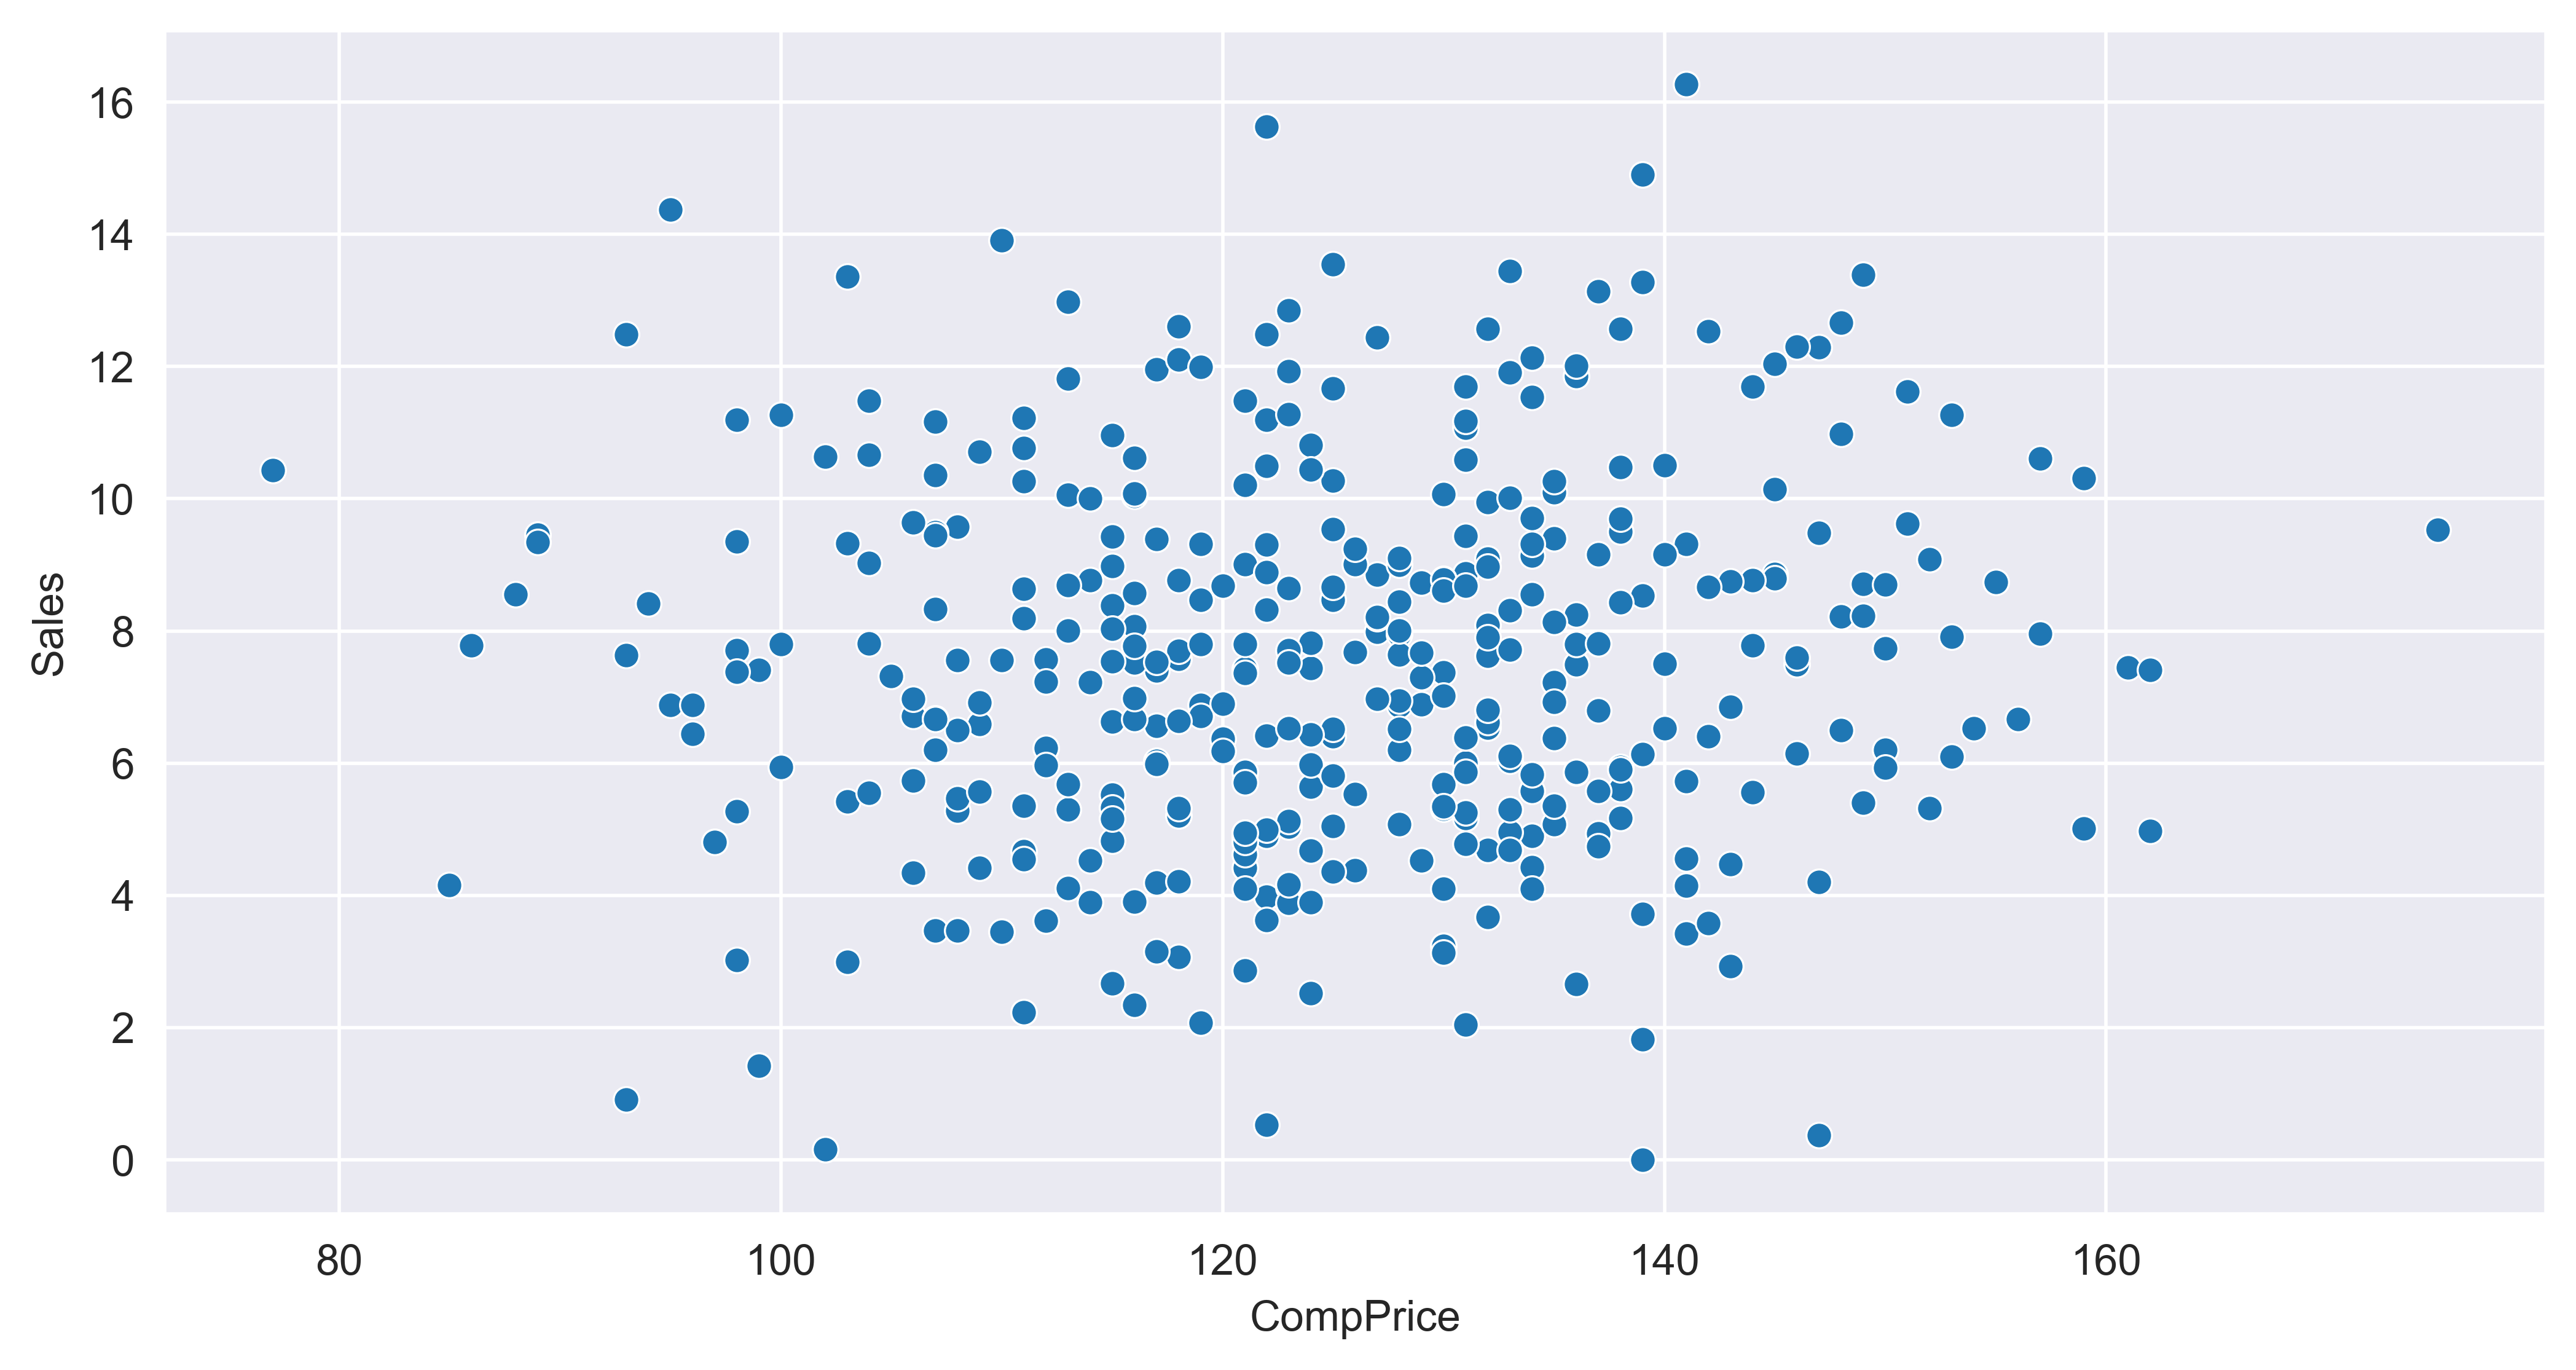

In [7]:
sns.scatterplot(x=df['CompPrice'],y=df['Sales'])

<Axes: xlabel='Population', ylabel='Sales'>

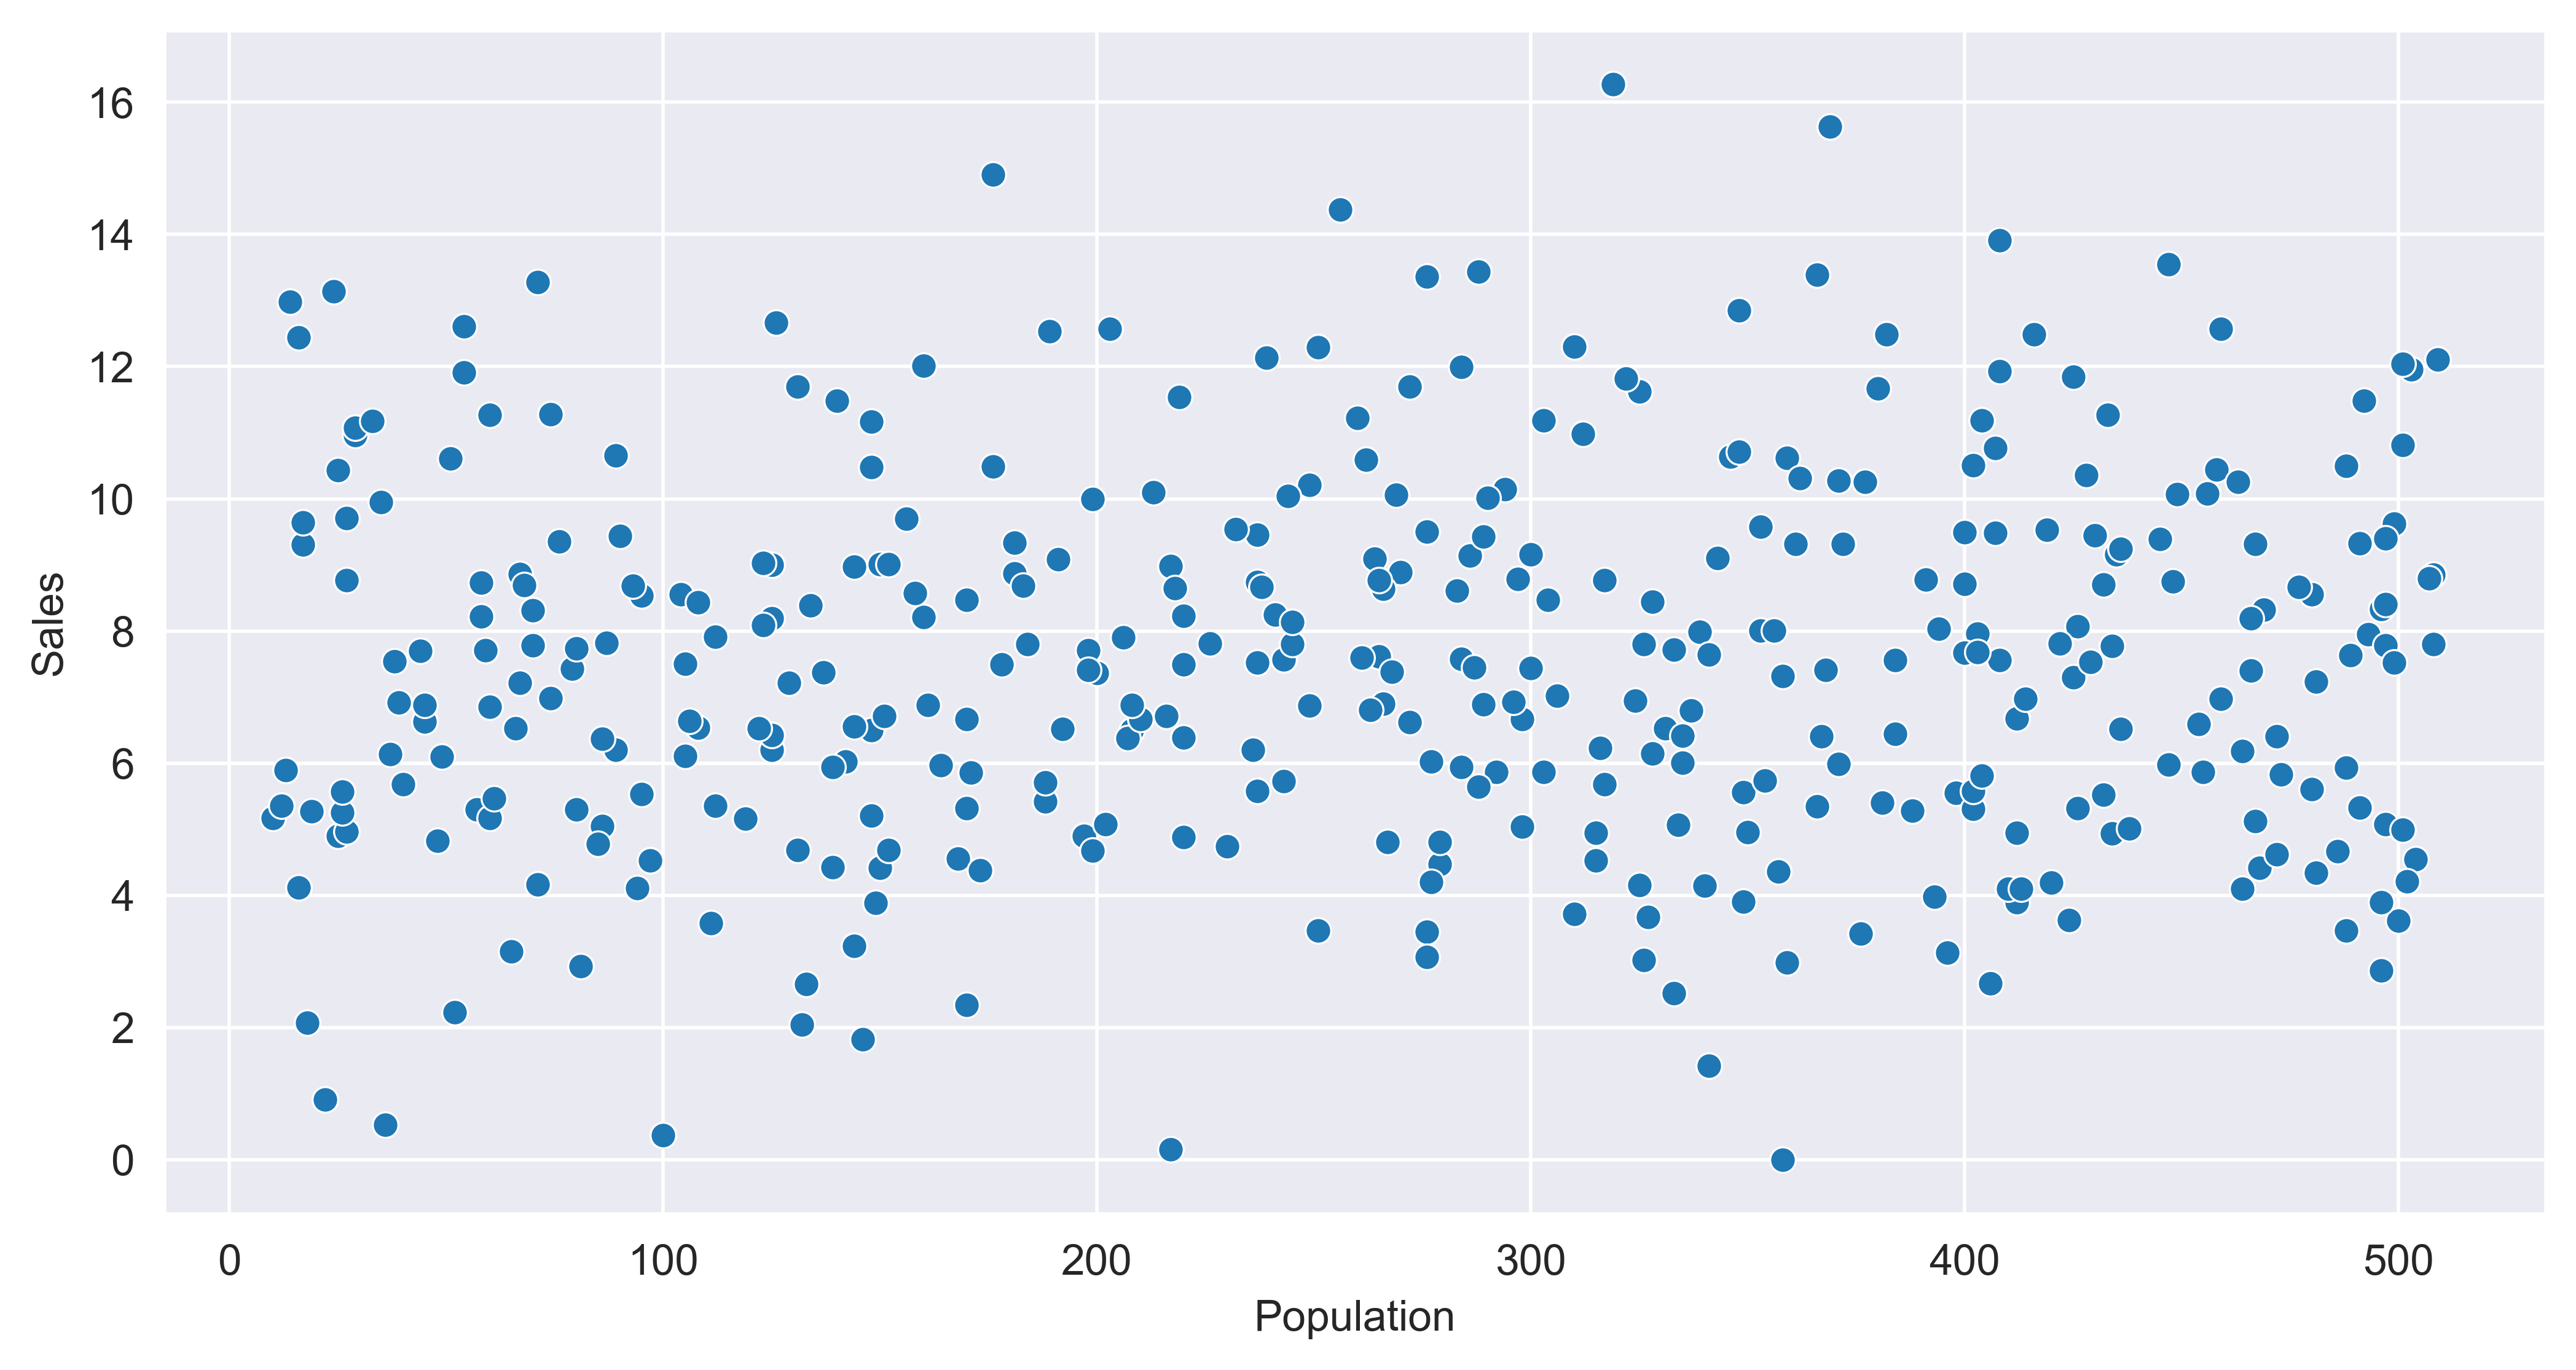

In [8]:
sns.scatterplot(x=df['Population'],y=df['Sales'])

<Axes: xlabel='Urban_Yes', ylabel='count'>

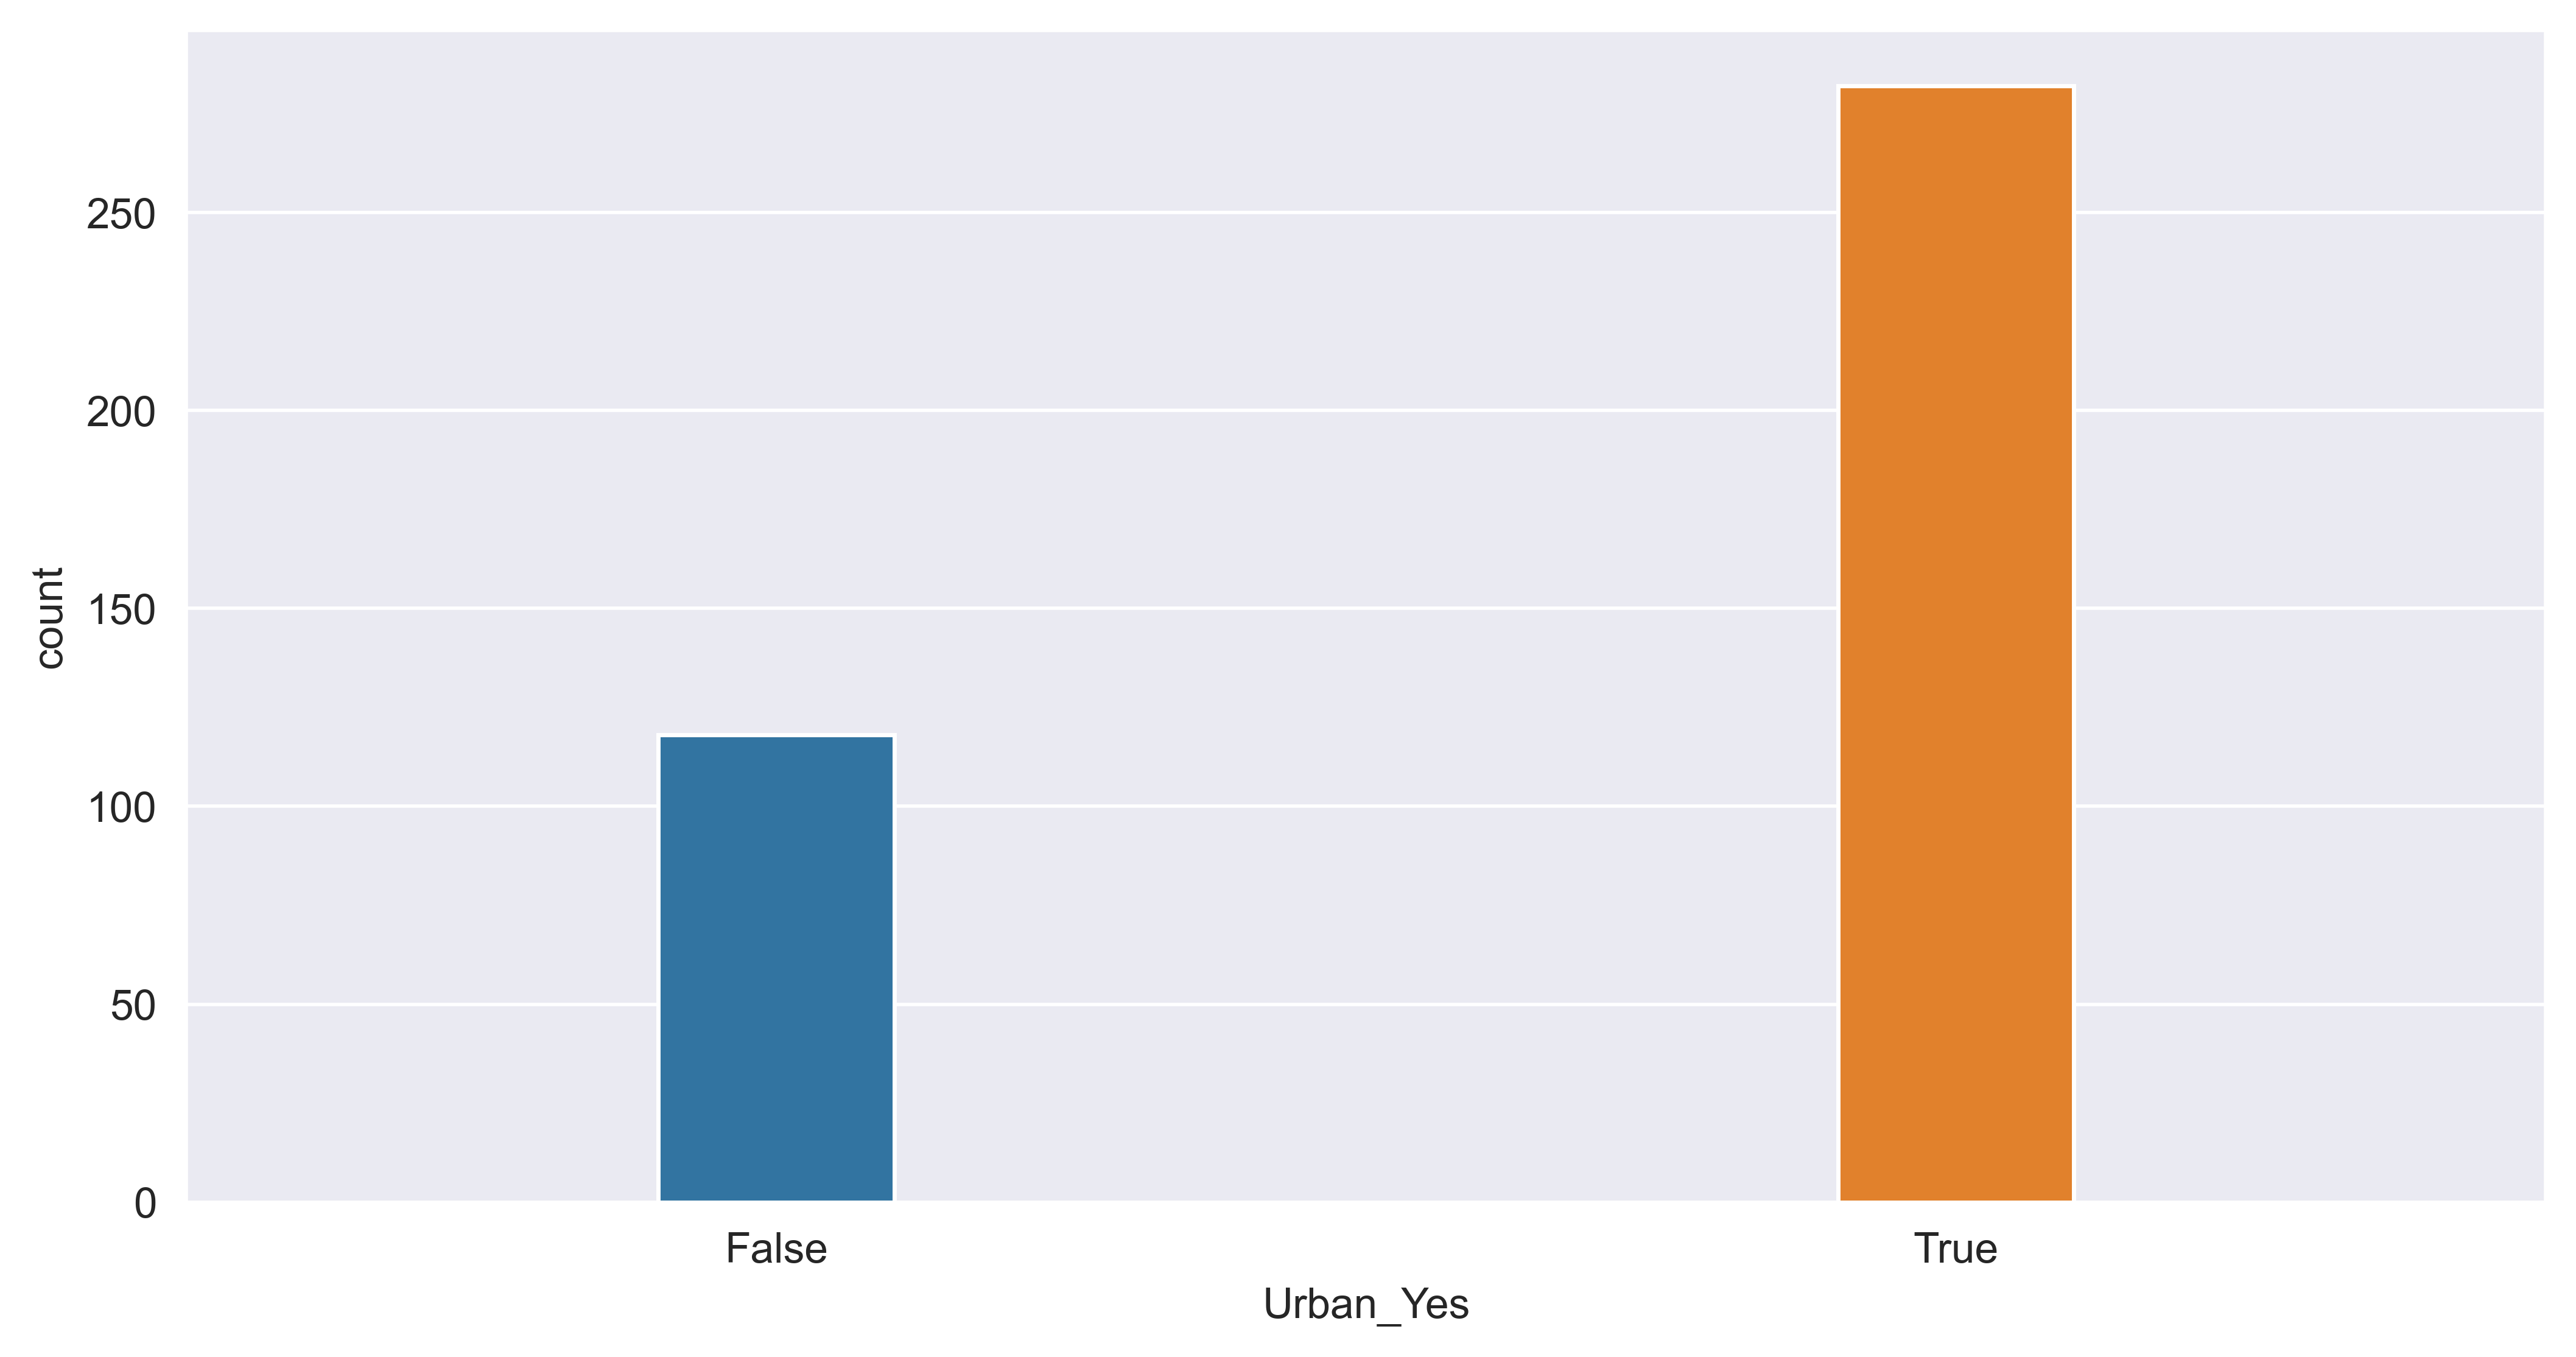

In [9]:
sns.countplot(data=df,x='Urban_Yes',width=0.2)

<Axes: xlabel='US_Yes', ylabel='count'>

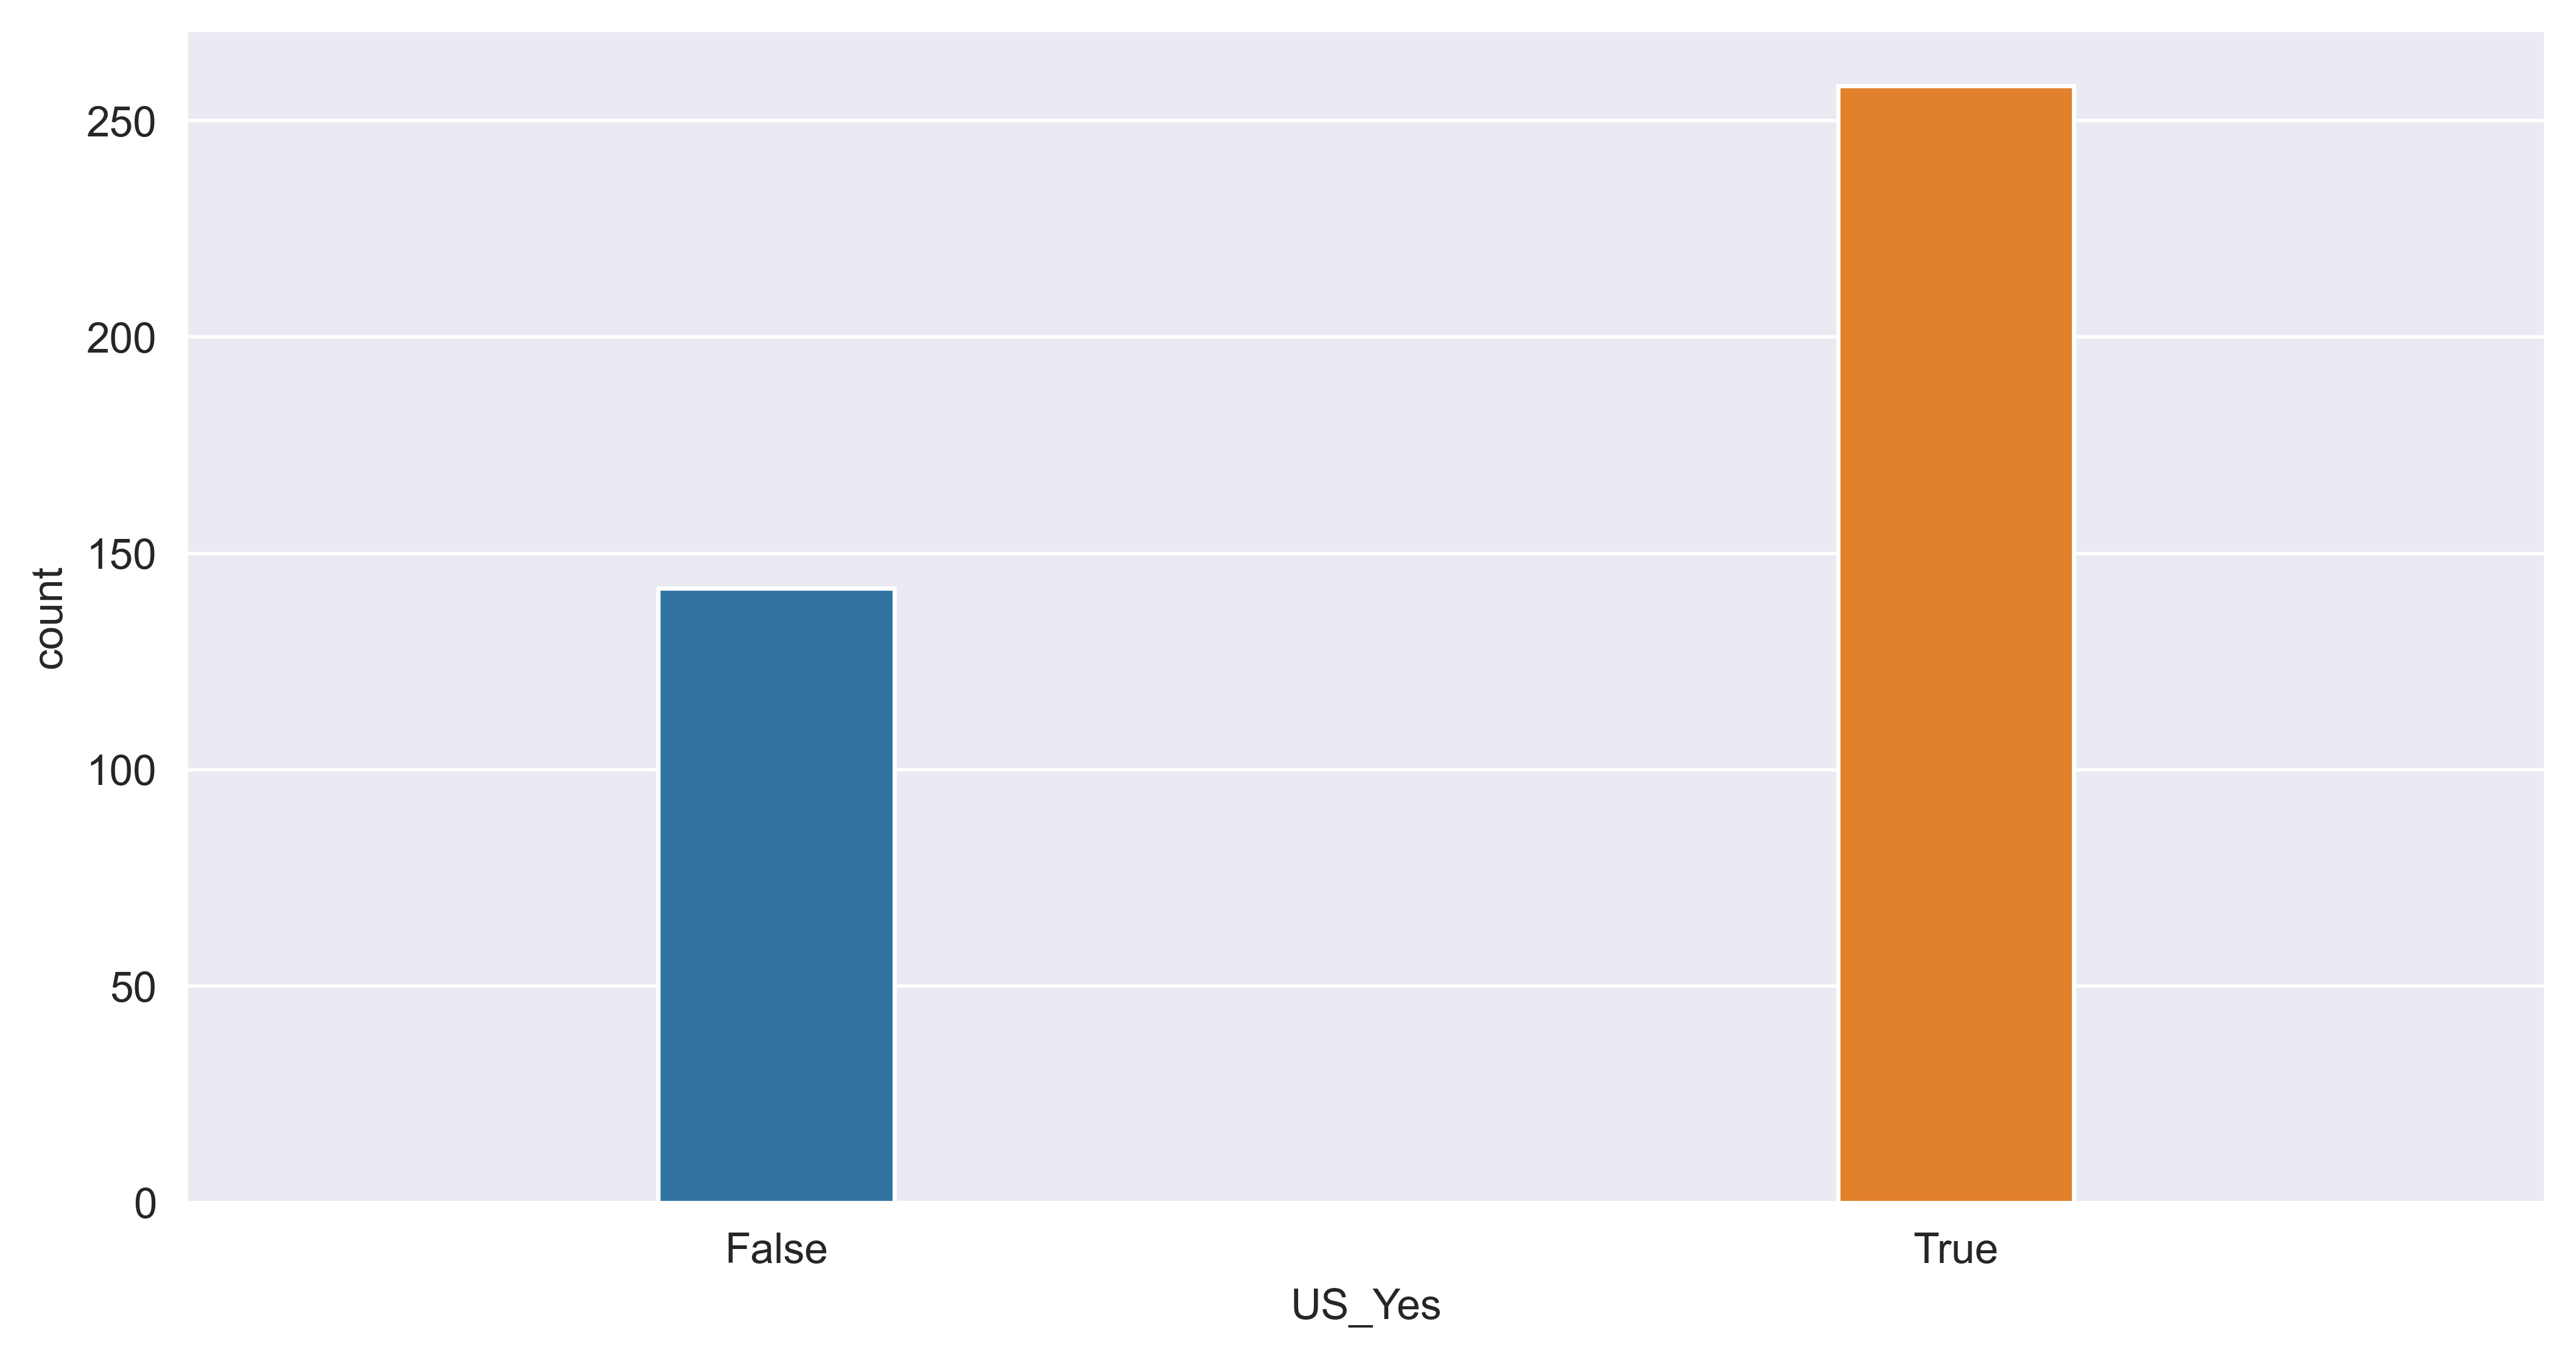

In [10]:
sns.countplot(data=df,x='US_Yes',width=0.2)

# 4 - Random Forest

In [11]:
# split the feature and target
X = df.drop('Sales',axis=1)
Y = df['Sales']

In [12]:
# split train test 
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.1,random_state=42)

In [13]:
RF = RandomForestRegressor().fit(xtrain,ytrain)

In [14]:
print('Training accuracy: ', RF.score(xtrain,ytrain))
print('Testing Accuracy: ', RF.score(xtest,ytest))

Training accuracy:  0.9540371727672587
Testing Accuracy:  0.7368224378213251


# 5 - Hyperparameter

In [15]:
params = {'n_estimators':[100,150,300,200,500],
    'criterion' : ['squared_error', 'absolute_error','friedman_mse'],
    'max_depth' : [10,15,25,35],
}
grid = GridSearchCV(RandomForestRegressor(),params,verbose=1).fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [16]:
grid.best_score_ , grid.best_params_ 

(0.6733172398329033,
 {'criterion': 'friedman_mse', 'max_depth': 10, 'n_estimators': 300})

In [17]:
grid.best_estimator_.score(xtest,ytest)

0.7344496740966535

In [18]:
grid.best_estimator_.score(xtrain,ytrain)

0.9543812724659061

In [19]:
## Final model
RF = RandomForestRegressor(n_estimators=500,criterion='friedman_mse',max_depth=15).fit(xtrain,ytrain)

# 6 - Feature Importance

In [20]:
RF.feature_importances_

array([0.09493289, 0.05509646, 0.08280359, 0.0363887 , 0.30627846,
       0.10544396, 0.02968774, 0.22756414, 0.04969018, 0.00575488,
       0.00635899])

In [21]:
feature_df = pd.DataFrame({'Feature':X.columns,
                          'Importance':RF.feature_importances_})
feature_df.sort_values('Importance',ascending=False,inplace=True)

In [22]:
feature_df

,Feature,Importance
4,Price,0.306278
7,ShelveLoc_Good,0.227564
5,Age,0.105444
0,CompPrice,0.094933
2,Advertising,0.082804
1,Income,0.055096
8,ShelveLoc_Medium,0.049690
3,Population,0.036389
6,Education,0.029688
10,US_Yes,0.006359


<Axes: xlabel='Importance', ylabel='Feature'>

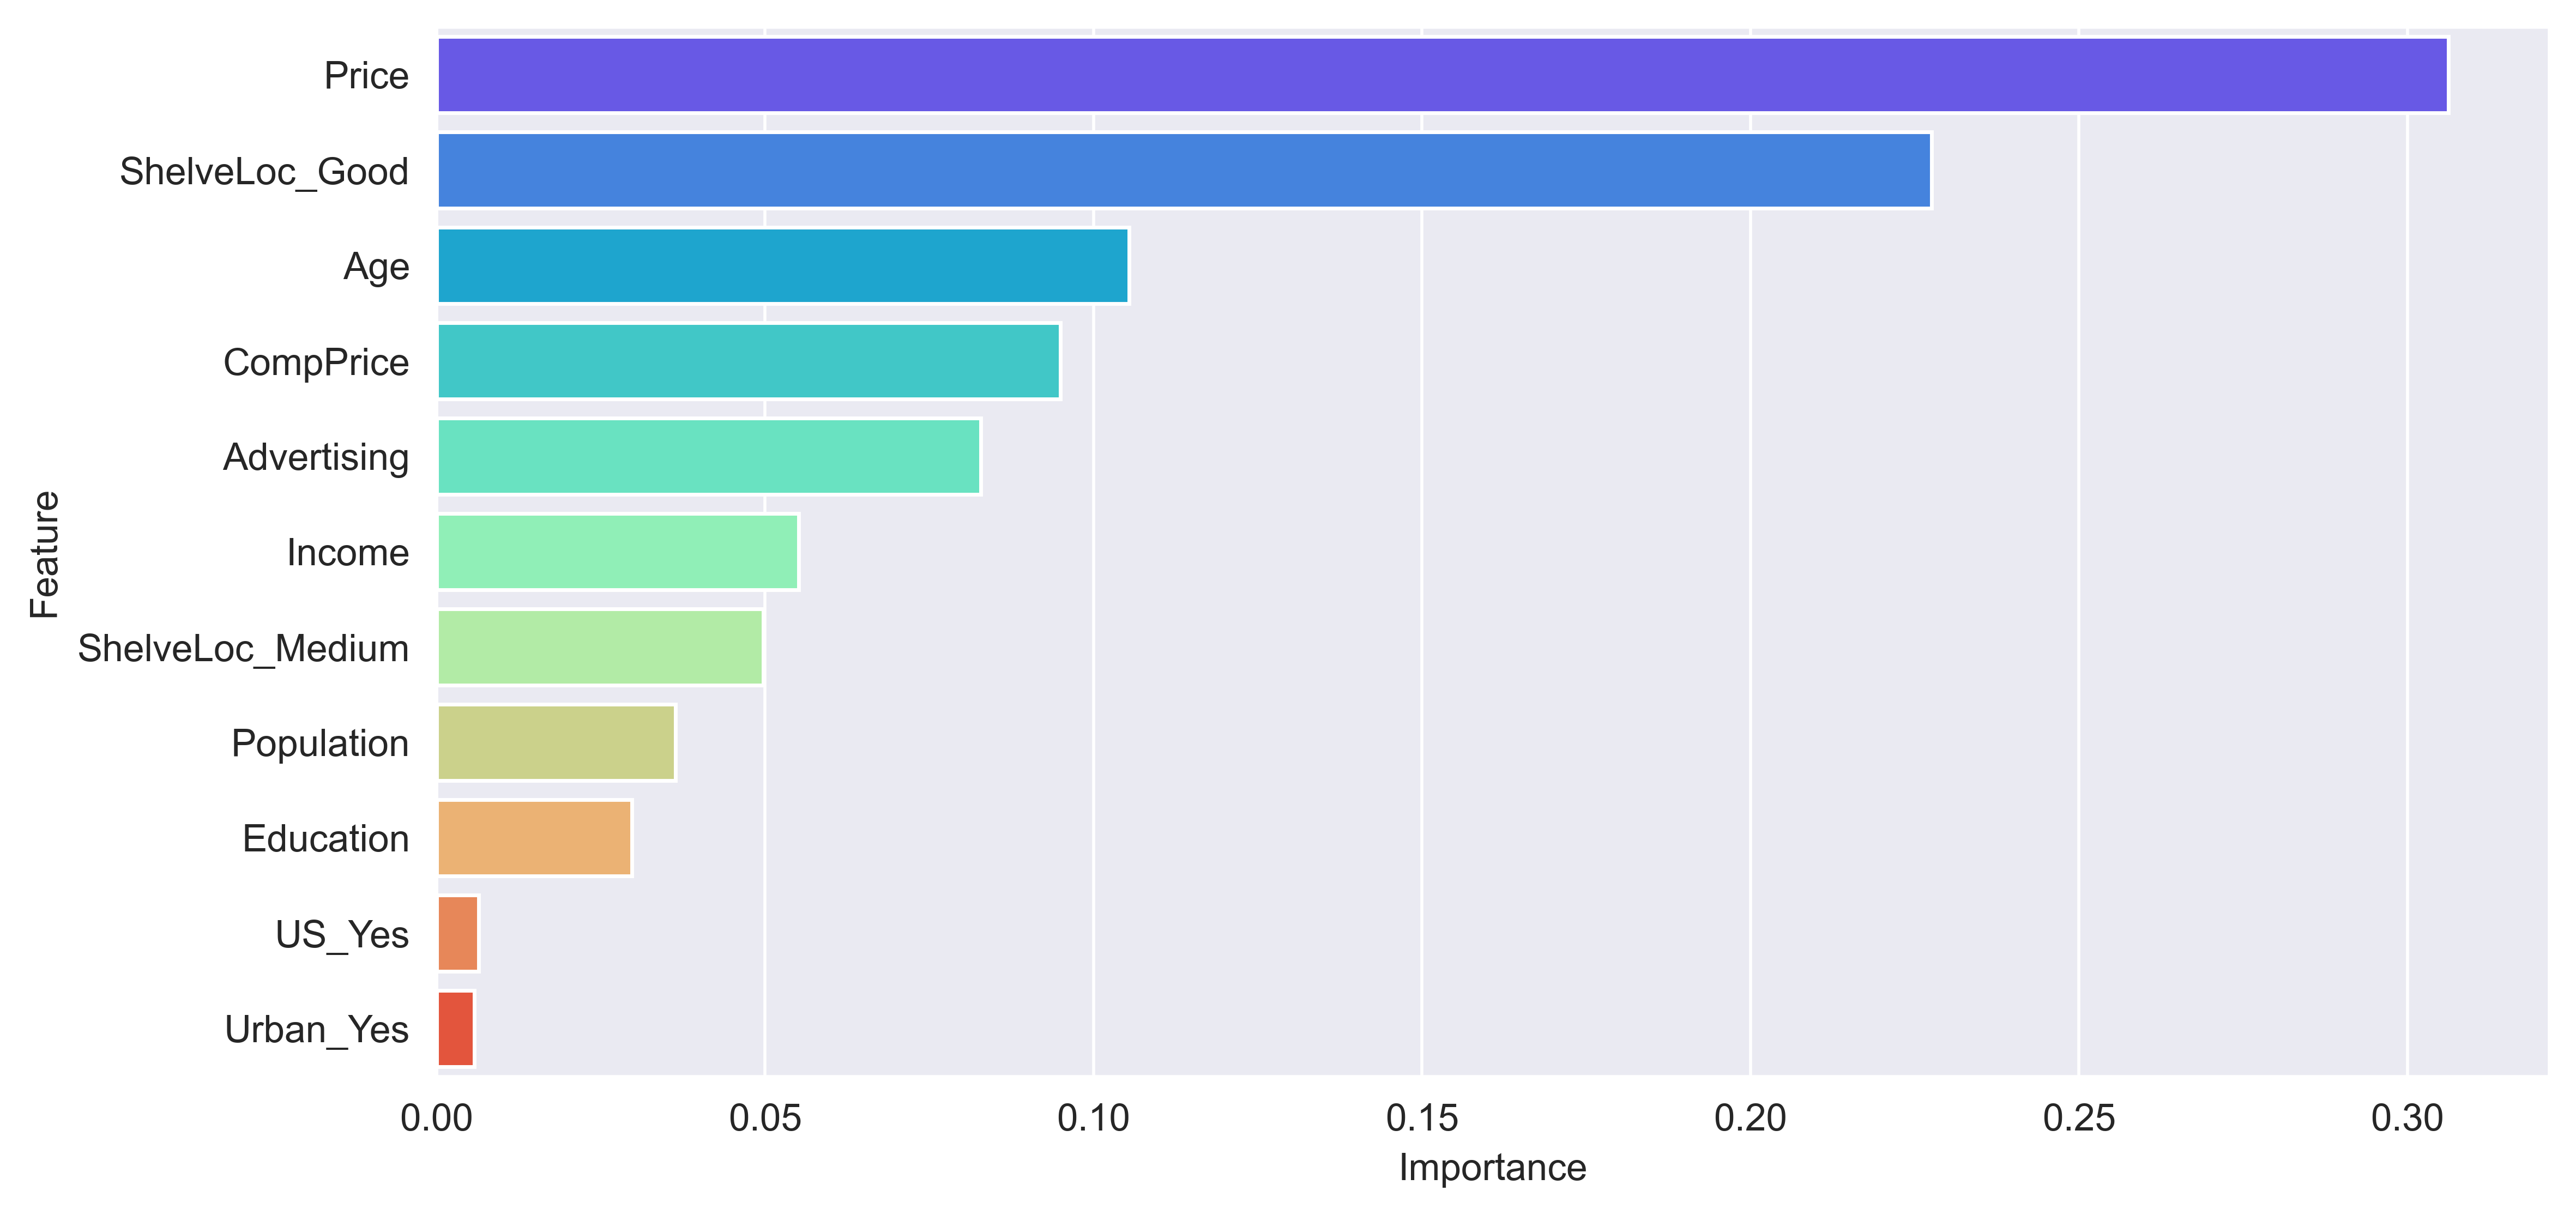

In [23]:
sns.barplot(data=feature_df,y='Feature',x='Importance',palette='rainbow')

*Observation :*
* *Price has the highest importance.*
* *Top 3 features that affect sales are Price , ShelveLoc_Good and Age*